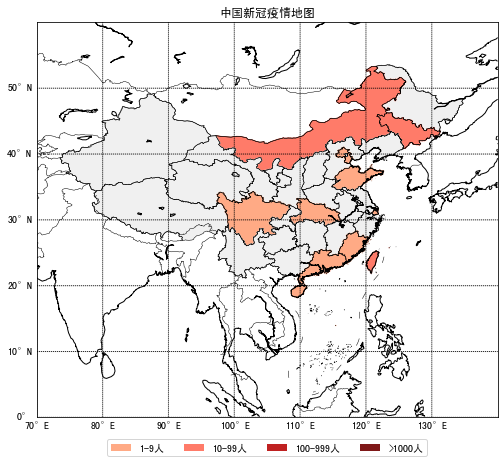

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.figure
from matplotlib.patches import Polygon
from mpl_toolkits.basemap import Basemap

# 准备行政区域确诊分布数据
last_day_corona_virus_of_china = pd.read_json('../data/last_day_corona_virus_of_china.json')
current_confirmed_count = last_day_corona_virus_of_china.pivot_table(values='currentConfirmedCount', index='provinceName')
data = current_confirmed_count.to_dict()['currentConfirmedCount']

# 绘制行政区域确诊分布数据
lat_min = 0
lat_max = 60
lon_min = 70
lon_max = 140

handles = [
    matplotlib.patches.Patch(color='#ffaa85', alpha=1, linewidth=0),
    matplotlib.patches.Patch(color='#ff7b69', alpha=1, linewidth=0),
    matplotlib.patches.Patch(color='#bf2121', alpha=1, linewidth=0),
    matplotlib.patches.Patch(color='#7f1818', alpha=1, linewidth=0),
]
labels = ['1-9人', '10-99人', '100-999人', '>1000人']

fig = plt.figure(figsize=(8, 10))

axes = fig.add_axes((0.1, 0.12, 0.8, 0.8))  # rect = l,b,w,h
m = Basemap(llcrnrlon=lon_min, urcrnrlon=lon_max, llcrnrlat=lat_min, urcrnrlat=lat_max, resolution='l', ax=axes)
m.readshapefile('china-shapefiles-master/china', 'province', drawbounds=True)
m.readshapefile('china-shapefiles-master/china_nine_dotted_line', 'p', drawbounds=True)
m.drawcoastlines(color='black')  # 洲际线
m.drawcountries(color='black')  # 国界线
m.drawparallels(np.arange(lat_min, lat_max, 10), labels=[1, 0, 0, 0])  # 画经度线
m.drawmeridians(np.arange(lon_min, lon_max, 10), labels=[0, 0, 0, 1])  # 画纬度线

for info, shape in zip(m.province_info, m.province):
    pname = info['OWNER'].strip('\x00')
    fcname = info['FCNAME'].strip('\x00')
    if pname != fcname:  # 不绘制海岛
        continue

    for key in data.keys():
        if key in pname:
            if data[key] == 0:
                color = '#f0f0f0'
            elif data[key] < 10:
                color = '#ffaa85'
            elif data[key] < 100:
                color = '#ff7b69'
            elif data[key] < 1000:
                color = '#bf2121'
            else:
                color = '#7f1818'
            break

    poly = Polygon(shape, facecolor=color, edgecolor=color)
    axes.add_patch(poly)

axes.legend(handles, labels, bbox_to_anchor=(0.5, -0.11), loc='lower center', ncol=4)
axes.set_title("中国新冠疫情地图")
fig.savefig('中国新冠疫情地图.png')
plt.show()